# Heart Disease Dataset Analysis

## Introduction
This Jupyter Notebook provides an analysis of a heart disease dataset. The dataset includes various clinical parameters of patients and whether they have heart disease. The goal is to uncover insights and patterns that can help in predicting heart disease.


In [1]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## Loading the Dataset
The dataset is loaded into a Pandas DataFrame for analysis.


In [2]:
# Loading the Dataset
heart_data = pd.read_csv('heart.csv')


## Linear Regression Analysis: Age vs. Max Heart Rate

### Visualization: Scatter Plot with Regression Line
The scatter plot shows the relationship between maximum heart rate and age.
The linear regression model is used to predict age based on maximum heart rate.
The graph is crucial for understanding if there's a significant relationship between age and maximum heart rate.


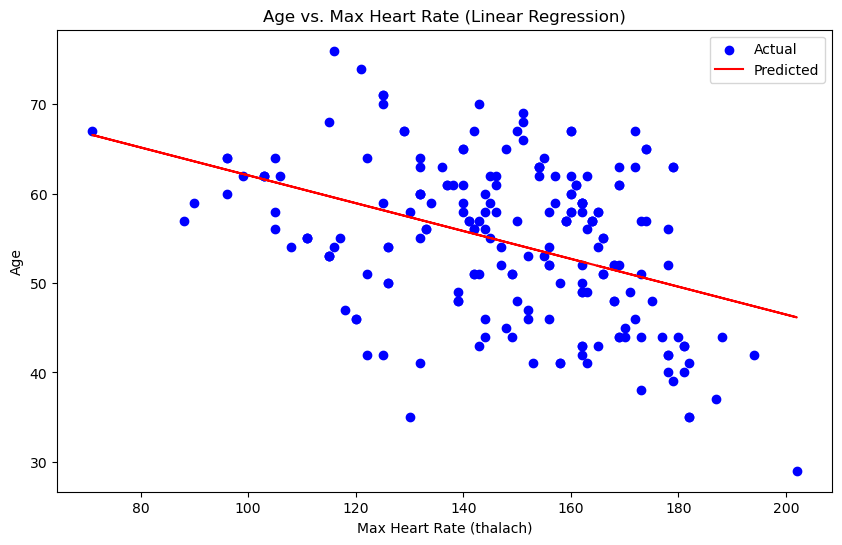

In [3]:
# Linear Regression Analysis
X = heart_data[['thalach']]
y = heart_data['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Age vs. Max Heart Rate (Linear Regression)')
plt.xlabel('Max Heart Rate (thalach)')
plt.ylabel('Age')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


## Additional Data Visualizations

### 1. Pie Chart: Gender Distribution
Shows the proportion of males and females in the dataset.
Understanding gender distribution is crucial for heart disease analysis.

### 2. Bar Chart: Average Cholesterol Levels by Heart Disease Presence
Compares average cholesterol levels between patients with and without heart disease.
Highlights cholesterol as a potential risk factor.

### 3. Histogram: Age Distribution
Illustrates the frequency distribution of ages.
Age distribution helps understand the age range most affected by heart conditions.

### 4. Heatmap: Correlation Matrix
Shows the correlation coefficients between all pairs of variables.
Identifies relationships between different variables.

### 5. Bubble Chart: Age vs. Max Heart Rate with Cholesterol Levels
Scatter plot of age against max heart rate, with bubble size indicating cholesterol levels.
Provides a multi-dimensional view of how age, max heart rate, and cholesterol levels interact with heart disease presence.


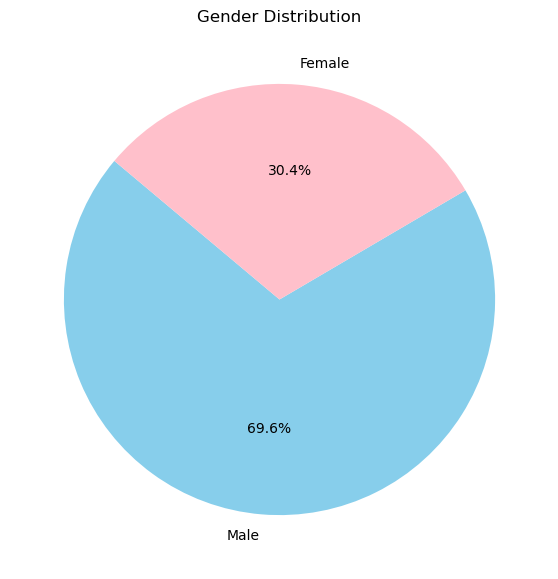

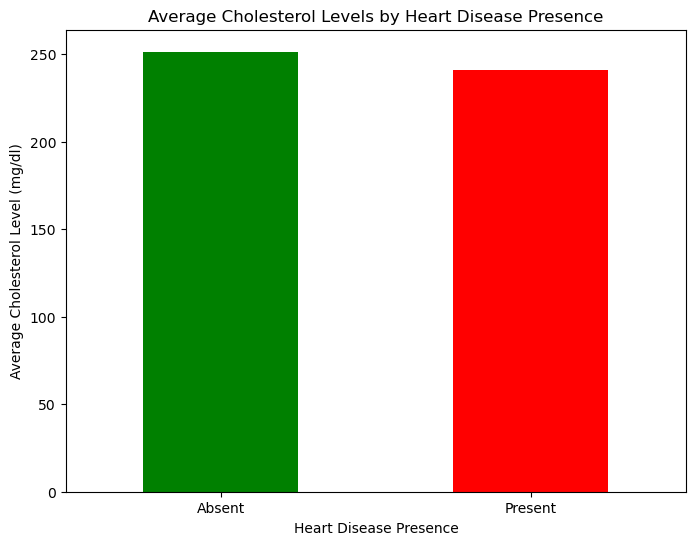

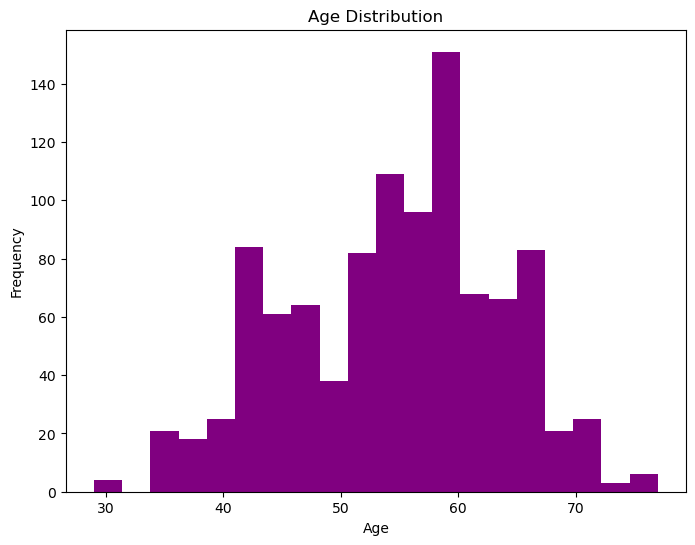

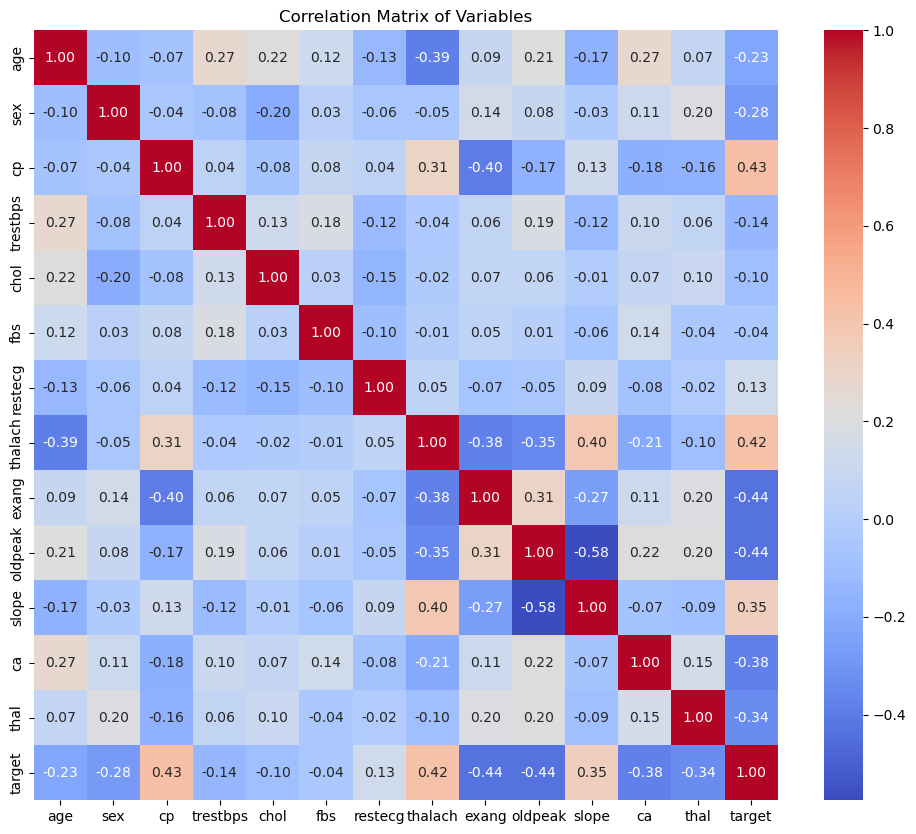

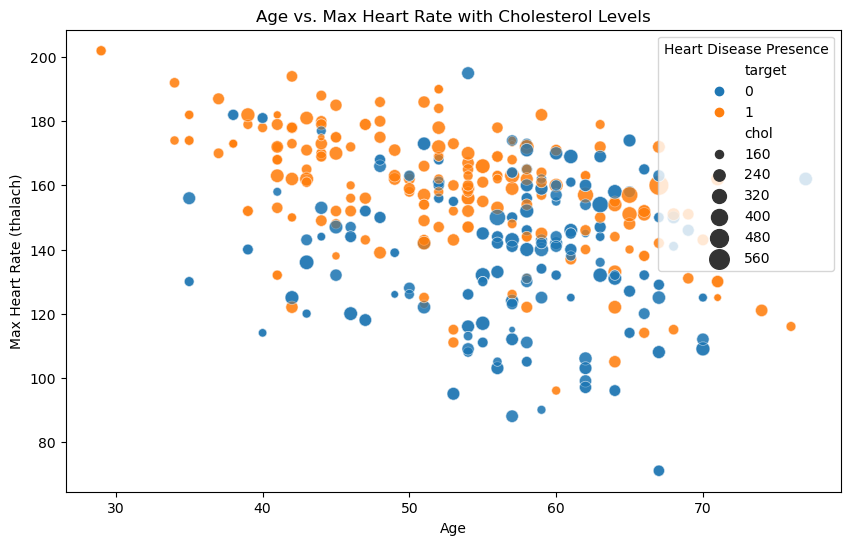

In [4]:
# Additional Data Visualizations

# Pie Chart: Gender Distribution
gender_counts = heart_data['sex'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.show()

# Bar Chart: Average Cholesterol Levels by Heart Disease Presence
avg_chol = heart_data.groupby('target')['chol'].mean()
plt.figure(figsize=(8, 6))
avg_chol.plot(kind='bar', color=['green', 'red'])
plt.title('Average Cholesterol Levels by Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Average Cholesterol Level (mg/dl)')
plt.xticks(ticks=[0, 1], labels=['Absent', 'Present'], rotation=0)
plt.show()

# Histogram: Age Distribution
plt.figure(figsize=(8, 6))
plt.hist(heart_data['age'], bins=20, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Heatmap: Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(heart_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

# Bubble Chart: Age vs. Max Heart Rate with Cholesterol Levels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heart_data, x='age', y='thalach', size='chol', hue='target', alpha=0.5, sizes=(20, 200))
plt.title('Age vs. Max Heart Rate with Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.legend(title='Heart Disease Presence', loc='upper right')
plt.show()


## Logistic Regression Analysis for Predicting Heart Disease

### Explanation
Logistic regression is used to predict the probability of a binary outcome based on one or more predictor variables. In this case, we use logistic regression to predict the presence of heart disease (`target`) based on selected features from the dataset. This type of analysis is crucial for understanding the relationships between various clinical parameters and the likelihood of having heart disease.


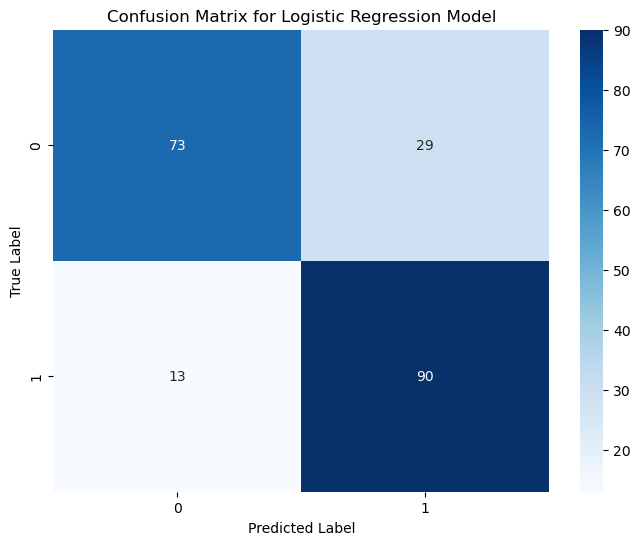

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [5]:
# Importing necessary libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Selecting features for the logistic regression model
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = heart_data[features]
y = heart_data['target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = logistic_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Displaying the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Printing the classification report
print("Classification Report for Logistic Regression Model:")
print(class_report)


### Interpretation of Results
The confusion matrix and classification report provide insights into the performance of the logistic regression model. The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions. The classification report provides key metrics like precision, recall, and F1-score for each class. This information is essential to evaluate the model's accuracy and its ability to generalize to new data.


## Visualizing Logistic Regression Results with ROC Curve

### Explanation
The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are valuable tools for evaluating the performance of logistic regression in binary classification tasks. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The AUC summarizes the ROC curve into a single value, with higher values indicating better model performance.


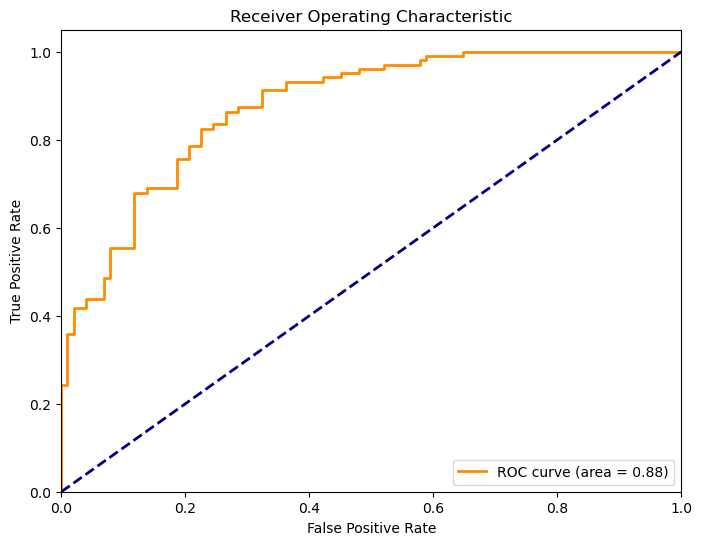

In [6]:
# Importing necessary libraries for ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

# Calculating probabilities for the test set
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculating the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Interpretation of the ROC Curve
The ROC curve demonstrates the trade-off between sensitivity (or TPR) and specificity (1 - FPR). The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The AUC, being 0.5 for a model with no discriminative ability and 1 for a perfect model, provides a single measure of overall performance. A model with an AUC closer to 1 is considered to have good predictive power.


### In-Depth Interpretation of the ROC Curve and AUC

#### Understanding the ROC Curve:
1. **True Positive Rate (TPR)**: The ROC curve plots the True Positive Rate (TPR), also known as sensitivity or recall, on the Y-axis. TPR is the ratio of correctly predicted positive observations to the total actual positives. It indicates how well the model identifies positive outcomes.

2. **False Positive Rate (FPR)**: On the X-axis, the curve plots the False Positive Rate (FPR), which is the ratio of incorrectly predicted positive observations to the total actual negatives. It shows the proportion of false positives among the negative cases.

3. **Threshold Settings**: Each point on the ROC curve represents a different threshold setting of the logistic regression model. By adjusting the threshold, you can increase either sensitivity or specificity, but this often comes at the expense of the other metric.

#### Interpreting the Shape of the Curve:
1. **Ideal Curve**: An ideal ROC curve would shoot straight up to the top left corner of the plot, indicating a high TPR and a low FPR. This would mean perfect discrimination of positive and negative classes.

2. **Area Under the Curve (AUC)**: The AUC summarizes the entire ROC curve into a single value. An AUC of 1.0 represents a perfect test; the classifier correctly predicts all positive and negative cases. An AUC closer to 0.5 suggests that the model has no discriminative ability and is as good as random guessing.

3. **Model Performance**:
   - **High AUC (Close to 1)**: Indicates that the model is well capable of differentiating between patients with and without heart disease.
   - **Moderate AUC**: Suggests that the model has a reasonable rate of correctly classifying positive and negative cases, but there is still room for improvement.
   - **Low AUC (Close to 0.5)**: Implies that the model's ability to differentiate between positive and negative cases is inadequate.

#### Practical Implications:
1. **Clinical Decision-Making**: In the context of heart disease prediction, a high TPR is desired as it means more true cases of heart disease are correctly identified. However, this should not substantially increase the FPR, which would lead to many false alarms.

2. **Trade-off Between Sensitivity and Specificity**: The ROC curve helps in identifying the right balance between sensitivity and specificity for the model. Depending on the clinical requirements, a threshold can be chosen where the benefits of true positives outweigh the costs of false positives.

3. **Comparing Models**: If there are multiple models, the one with the higher AUC can be considered better at distinguishing between patients with and without heart disease.

In summary, the ROC curve and AUC are powerful tools for evaluating the effectiveness of a logistic regression model in a binary classification context. They provide insights not just into the accuracy of the model but also into its predictive balance, helping to guide decisions about threshold settings and model selection in a healthcare setting.


## Decision Tree Classification Analysis for Predicting Heart Disease

### Explanation
A Decision Tree is a flowchart-like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules. This approach is particularly useful for its interpretability and ease of understanding.


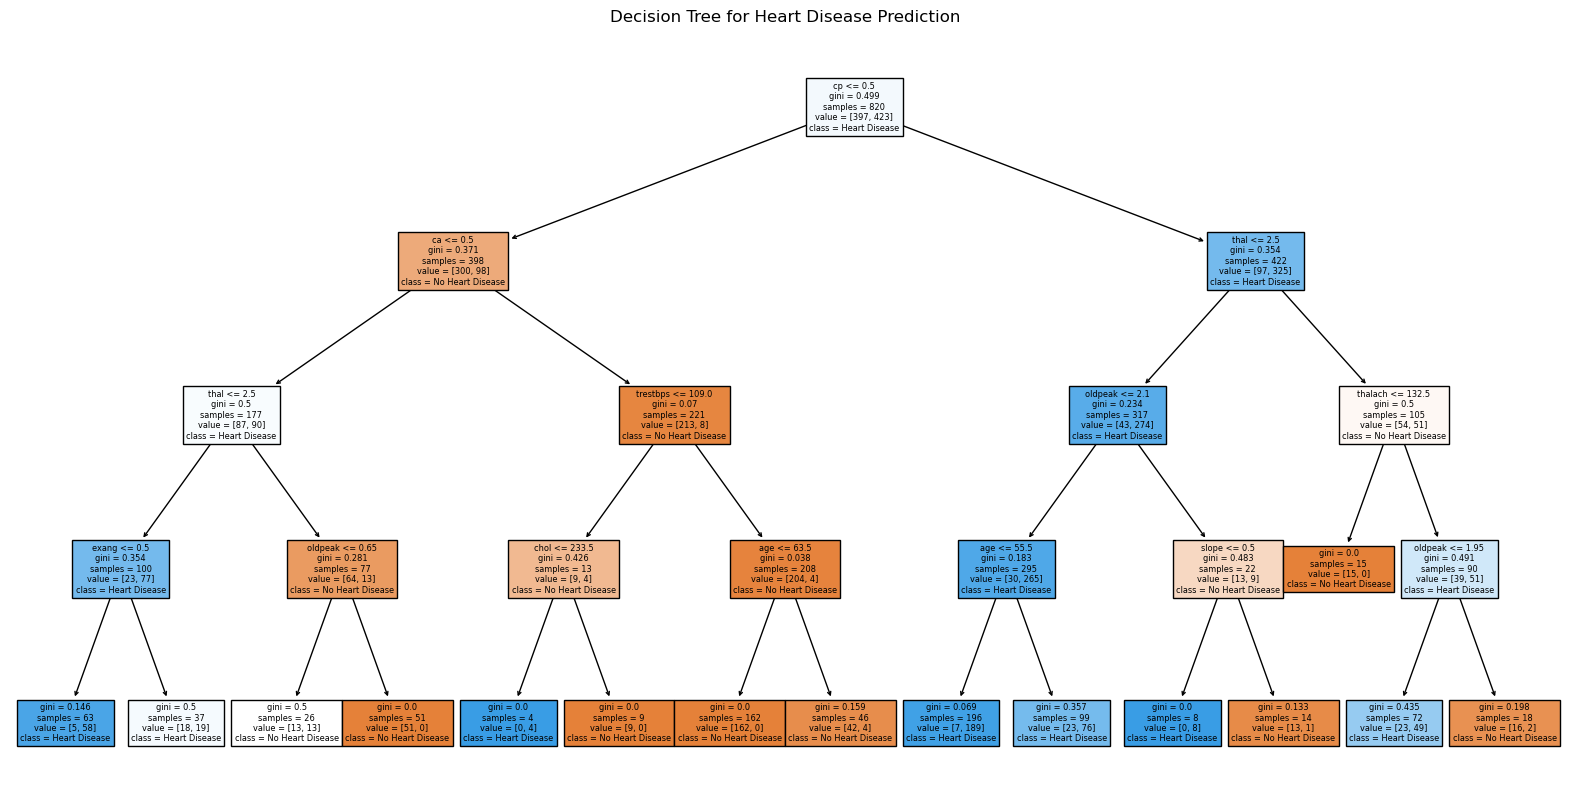

In [7]:
# Importing necessary libraries for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Creating the Decision Tree model
decision_tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Training the model with the dataset
decision_tree_model.fit(X_train, y_train)

# Making predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Plotting the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, filled=True, feature_names=features, class_names=['No Heart Disease', 'Heart Disease'])
plt.title('Decision Tree for Heart Disease Prediction')
plt.show()


### Interpretation of the Decision Tree
The decision tree diagram shows the series of splitting rules starting from the root node to the leaf nodes. Each internal node splits the dataset based on the attribute that results in the largest information gain. The leaf nodes represent the final decision or classification. 

#### Key Points:
1. **Node Interpretation**: Each node shows the condition on which the split is made, the Gini impurity, the total number of samples, and the distribution of samples in each class.

2. **Tree Depth**: The depth of the tree is a critical parameter. Deeper trees are more complex and may lead to overfitting. A shallower tree might not capture enough information about the data.

3. **Feature Importance**: The top nodes of the tree are generally the most important features for classification. This information can be critical in understanding the key factors contributing to heart disease.

4. **Rules Extraction**: The paths from the root to leaf represent rules that can be interpreted easily. For example, if a path leads to a leaf node predicting heart disease, the sequence of conditions along the path forms a rule for that prediction.

#### Practical Application
Decision Trees are particularly useful for understanding the decision-making logic and for deriving specific rules and patterns from the data. They can provide insights into which factors are critical in predicting heart disease and can be used as a basis for further analysis or for developing simpler, rule-based systems in clinical settings.


### In-Depth Interpretation of the Decision Tree for Heart Disease Prediction

#### Understanding the Decision Tree Structure:
1. **Nodes**: 
   - **Root Node**: This is the topmost node of the tree, representing the entire dataset. It splits into two or more homogeneous sets based on the most significant attribute.
   - **Internal Nodes**: These nodes test a condition on a specific attribute and branch out based on the outcome of the test.
   - **Leaf Nodes**: These are the terminal nodes that predict the outcome (in this case, presence or absence of heart disease).

2. **Branches**: Branches represent decisions or outcomes of the tests performed at nodes. They connect the nodes and indicate the flow from a question to an answer.

3. **Splitting Criteria**: Each internal node in the decision tree represents a decision rule. This is essentially the "question" that the node is asking about the data.

4. **Depth of the Tree**: The depth of a tree is a measure of how many levels it has. Deeper trees can model more complex relationships but are also more prone to overfitting.

#### Interpretation of the Nodes and Branches:
- Each internal node's decision rule effectively splits the dataset into two or more groups based on the values of the selected attribute. 
- The Gini impurity measure shown at each node provides a way to quantify the "purity" of the node, with lower values indicating that a node contains predominantly samples from a single class.
- The sample size in each node gives an idea of how many observations from the training dataset fall into that part of the decision tree.

#### Extracting Rules and Insights:
- The path from the root to each leaf can be interpreted as a rule. For example, a path might represent a rule like "If age > 50 and cholesterol level > 200, then the patient is likely to have heart disease".
- The decision tree can highlight the most important features for classification. For instance, if 'age' appears near the root of the tree, it's a crucial factor in predicting heart disease.

#### Evaluating the Tree's Performance:
- It's essential to evaluate the decision tree's performance on the test data to understand its predictive power and to ensure it's not overfitted.
- A confusion matrix or other classification metrics can be used to evaluate its accuracy, sensitivity, and specificity.

#### Practical Implications and Limitations:
- **Interpretability**: One of the key strengths of decision trees is their ease of interpretation. They can be visualized and understood even by those without an extensive background in data science.
- **Overfitting**: Decision trees are prone to overfitting, especially if they are very deep. Pruning methods or setting a maximum depth can help mitigate this issue.
- **Bias towards Dominant Classes**: Decision trees can be biased towards dominant classes, so it's crucial to balance the dataset if there's a significant class imbalance.

#### Conclusion:
The decision tree model provides a visual and interpretable method for understanding the factors contributing to heart disease. By analyzing the structure and rules of the tree, valuable insights can be gained into the relationships between different patient attributes and their impact on heart disease risk.


## Multiple Regression Analysis for Predicting Heart Disease

### Explanation
Multiple Regression Analysis is a statistical technique that allows us to examine the relationship between one dependent variable and several independent variables. This method is particularly useful in understanding how various factors collectively impact the likelihood of an outcome, such as the presence of heart disease. By analyzing the coefficients of the regression model, we can assess the influence of each predictor while controlling for the effects of other variables.


In [8]:
# Importing necessary libraries for Multiple Regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Selecting the independent variables for the regression model
independent_vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = heart_data[independent_vars]
y = heart_data['target']  # Dependent variable

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Printing the summary of the regression model
model_summary = model.summary()


In [9]:
# Displaying the model summary
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     82.56
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          1.05e-148
Time:                        00:45:44   Log-Likelihood:                -372.81
No. Observations:                1025   AIC:                             773.6
Df Residuals:                    1011   BIC:                             842.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8793      0.158      5.569      0.0

### Interpretation of the Multiple Regression Analysis

#### Coefficients Interpretation:
- Each coefficient in the regression model represents the change in the dependent variable (likelihood of heart disease) for a one-unit change in the corresponding independent variable, holding all other variables constant.
- Positive coefficients indicate a positive relationship with the dependent variable, while negative coefficients indicate a negative relationship.

#### Significance of Variables:
- The p-values associated with each coefficient test the null hypothesis that the coefficient is zero (no effect). A small p-value (typically ≤ 0.05) indicates that you can reject the null hypothesis and that the variable is significant in predicting heart disease.

#### Model Fit:
- The R-squared value indicates the proportion of variance in the dependent variable that's predictable from the independent variables. A higher R-squared value means a better fit.
- The F-statistic and its associated p-value indicate the overall significance of the regression model.

#### Practical Implications:
- This analysis can identify the most significant factors contributing to heart disease.
- It can also provide insights for healthcare professionals to develop targeted prevention and treatment strategies based on the significant predictors.

#### Limitations:
- The presence of multicollinearity (when independent variables are highly correlated with each other) can affect the model’s coefficients and their interpretation.
- Regression models assume a linear relationship between the variables, which might not always hold true in real-world data.


## Partial Regression Plots

### Explanation
Partial regression plots are used in multiple regressions to show the relationship between the dependent variable and each independent variable, taking into account the other independent variables in the model. These plots can help in visually assessing the contribution and significance of individual variables.


C:\Users\bianj\AppData\Local\Temp\ipykernel_3764\1684215399.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


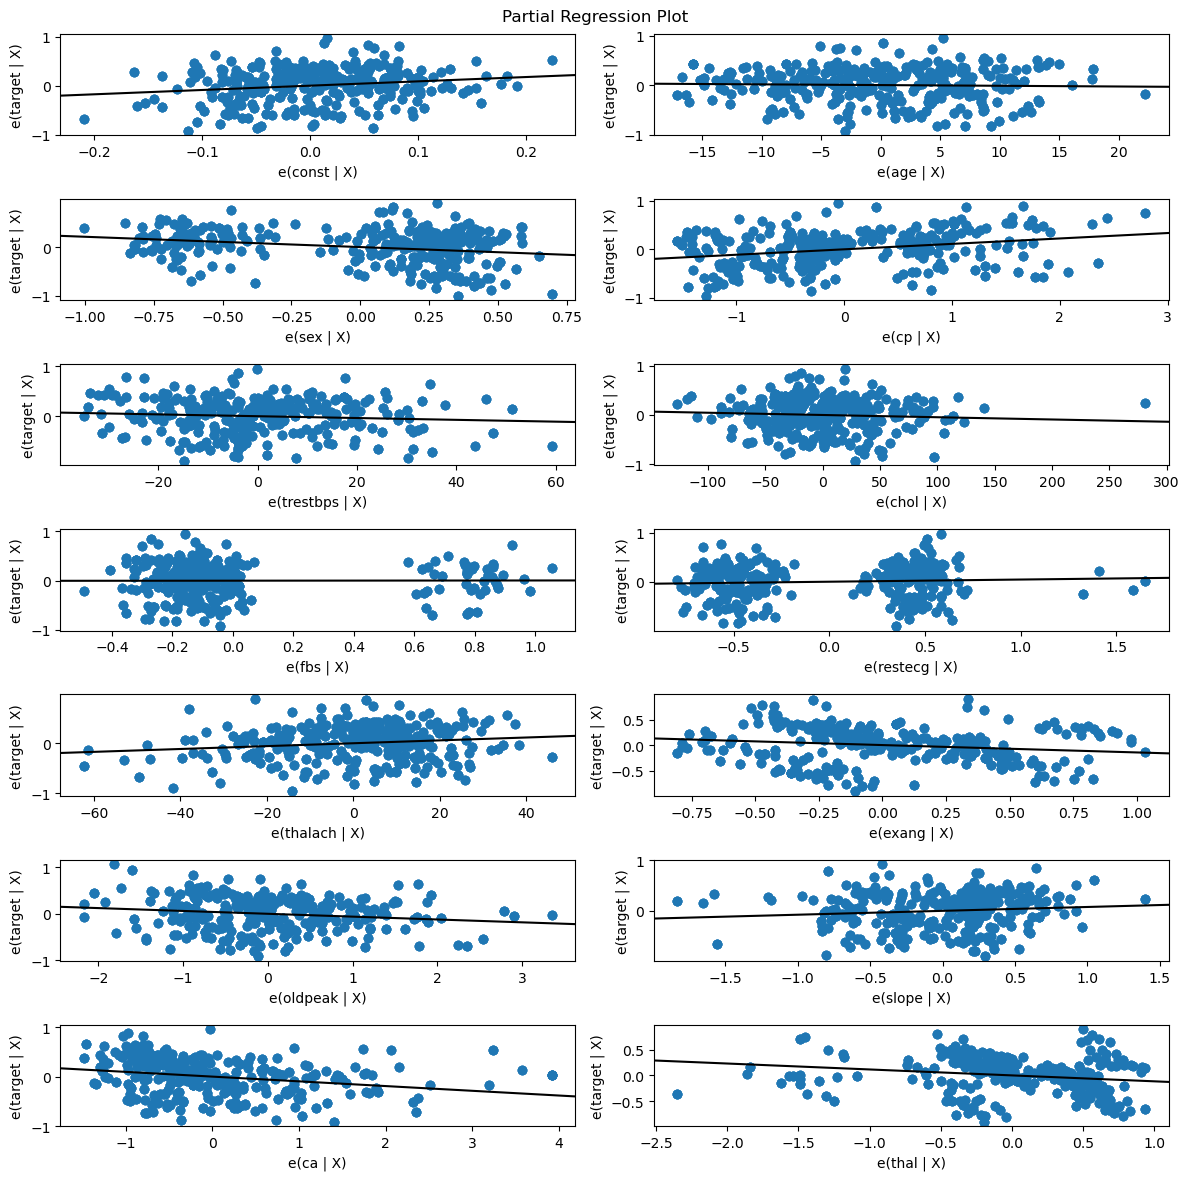

In [14]:
# Importing necessary libraries for Partial Regression Plots
from statsmodels.graphics.regressionplots import plot_partregress_grid

# Creating Partial Regression Plots
fig = plt.figure(figsize=(12, 12))
plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()


### Explanation of Partial Regression Plots

Partial regression plots, also known as added variable plots, are a unique tool in multiple regression analysis. They help in visualizing the relationship between the dependent variable and each independent variable, with the effects of other independent variables being accounted for or "partialed out." 

#### Key Aspects:
1. **Individual Variable Impact**: Each plot shows the effect of a particular independent variable on the dependent variable. This is done by controlling for the influence of other variables in the model.

2. **Intercept and Slope**: The intercept and slope in each plot represent how changes in the independent variable are associated with changes in the dependent variable, after removing the effects of other variables.

3. **Outliers and Leverage Points**: These plots can also help in identifying outliers or points with high leverage that may unduly influence the model.

4. **Residuals Analysis**: The spread of points around the line in each plot indicates whether the residuals (differences between observed and predicted values) are randomly distributed, which is a key assumption in regression analysis.

#### Why Use a Tight Layout?
- **Clarity in Presentation**: When dealing with multiple plots, especially in the context of multiple regression with several independent variables, plots can easily overlap or become cluttered. Using a 'tight layout' ensures that the plots are neatly arranged and do not overlap, making each plot clearly visible and easier to analyze.

#### Practical Use:
- Partial regression plots are particularly useful for understanding complex models where the relationships between variables are not easily discernable. They provide a clearer view of how each predictor contributes to the prediction of the dependent variable, independent of other predictors.


## Coefficient Plot for Multiple Regression Model

### Explanation
A coefficient plot visualizes the coefficients of the regression model, providing a clear view of the estimated effect size and direction (positive or negative) of each independent variable on the dependent variable. The plot can also include confidence intervals to indicate the uncertainty of these estimates.


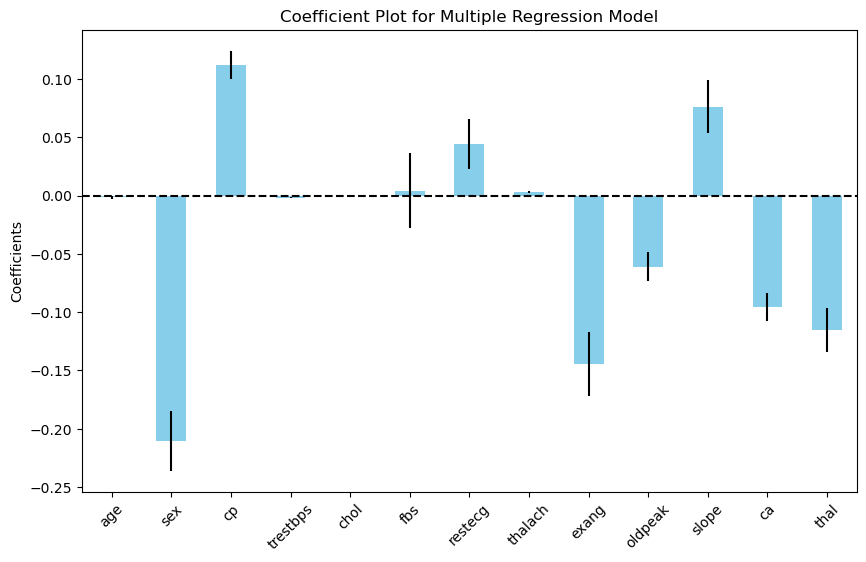

In [13]:
# Importing necessary libraries for Coefficient Plot
import matplotlib.pyplot as plt

# Coefficient Plot
coef = model.params[1:]
errors = model.bse[1:]
plt.figure(figsize=(10, 6))
coef.plot(kind='bar', yerr=errors, color='skyblue', error_kw=dict(ecolor='k'))
plt.title('Coefficient Plot for Multiple Regression Model')
plt.ylabel('Coefficients')
plt.axhline(y=0, linestyle='--', color='black')
plt.xticks(rotation=45)
plt.show()


### Explanation of Coefficient Plot

The coefficient plot is a graphical representation of the estimated coefficients of a regression model. This plot is especially useful in multiple regression analysis as it provides a comparative view of the influence of each independent variable on the dependent variable.

#### Key Aspects:
1. **Magnitude and Direction**: The length and direction of each bar indicate the size and direction (positive or negative) of the effect of each variable.

2. **Statistical Significance**: Error bars on the plot represent the standard error of each coefficient. A coefficient is statistically significant if its error bar does not cross the zero line.

3. **Comparative Analysis**: This plot allows for an easy comparison between variables to see which ones have a greater or lesser impact on the dependent variable.

4. **Interpretation of Coefficients**: 
   - **Positive Coefficients**: Indicate that as the independent variable increases, the dependent variable also increases, all else being equal.
   - **Negative Coefficients**: Suggest an inverse relationship between the independent and dependent variables.

#### Practical Use:
- Coefficient plots are valuable for presenting and interpreting regression results, especially when the model includes multiple predictors. They provide a clear and concise overview of how each variable contributes to the model, aiding in decision-making and strategy formulation.
